<a href="https://colab.research.google.com/github/kshitijzutshi/Teleco-Customer-Churn-Prediction/blob/main/Predicting_Customer_Churn_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Abstract

Customer churn, also known as attrition, occurs when a customer stops
doing business with a company. Understanding and detecting churn is the
first step to retaining these customers and improving the company’s
offerings.

The task is to perform a **churn analysis** from a [Kaggle data set](https://www.kaggle.com/blastchar/telco-customer-churn) which gives the
customer information data of a telecommunications company (Telco)
trying to better understand their customer churn likelihood. 

This is done by first taking a deep dive into the **Exploratory Data Analysis**
(EDA) process to get a better understanding of the data. Post the data cleaning and EDA we move towards **Feature selection** process, which will help us in two ways - 
1. **Reduce our dimensionality** for processing and data modeling.
2. Get insights about *what independent variables are more signifiicant in predicting our **Target** variable(Customer Churn)*

For feature selection we use **SelectKBest** and **Chi squared test**(as its a classification problem this test can be used). 

By using the understanding of P-values in Chi sqared output we are able to categorize significant and insignificant features. Thus answering questions pertaining to - what predictor variables are most important.


### 1. Initializing required libraries for data manupilation/data processing

In [62]:
import pandas as pd
import seaborn as sns
from numpy import unique
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from pandas.plotting import scatter_matrix

### 2. Reading the Dataset : Using Pandas to read CSV file

In [18]:
data = pd.read_csv('https://raw.githubusercontent.com/kshitijzutshi/Teleco-Customer-Churn-Prediction/main/dataset/Telco-Customer-Churn.csv')
df = pd.DataFrame(data)
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [19]:
# Get an overview of the dataset by looking at head -> Gives the first 5 rows of data

data_top = data.head() 
    
# display 
data_top 

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### 3. Data Cleaning - Cleaning the dataset to remove insignificant data

In order to do data cleaning we need to select the significant independent variables in out dataset and filter out the insignificant independent variables/features.

Following are things to check while performing data cleaning on a data set:

Reference source - https://machinelearningmastery.com/basic-data-cleaning-for-machine-learning/

    1. Messy Datasets
    2. Identify Columns That Contain a Single Value
    3. Delete Columns That Contain a Single Value
    4. Consider Columns That Have Very Few Values
    5. Remove Columns That Have A Low Variance
    6. Identify Rows that Contain Duplicate Data
    7. Delete Rows that Contain Duplicate Data


In [20]:
# Check for null values
data.isna().any(axis=0).any()

False

#### **Identify Columns That Contain a Single Value**

In [21]:
# Checking number of unique values in each column
data.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [22]:
# Find zero values.
zero_values_count = df.isin([0]).sum()
zero_values_count
# print((df['tenure'].isin([0]) == True).sum())

customerID             0
gender                 0
SeniorCitizen       5901
Partner                0
Dependents             0
tenure                11
PhoneService           0
MultipleLines          0
InternetService        0
OnlineSecurity         0
OnlineBackup           0
DeviceProtection       0
TechSupport            0
StreamingTV            0
StreamingMovies        0
Contract               0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
Churn                  0
dtype: int64

**Result** - *Since none of the coloumns have a single value, we dont neglect any feature as of now.*

### **Remove Columns That Have A Low Variance**

The *VarianceThreshold* class from the scikit-learn library supports this as a type of feature selection. An instance of the class can be created specify the “threshold” argument, which defaults to 0.0 to remove columns with a single value.

Since we have no single value in our dataset, this step can be neglected.

### **Identify and Delete Rows that Contain Duplicate Data**

Since most of the independent variables are categorical, we dont have duplicate data to identify or delete.

Looking at the predictor variables in the dataset - 


**Target**:

Churn - Whether the customer churned or not(Yes,No)

**Numeric Features:**

• Tenure — Number of months the customer has been with the company

• MonthlyCharges — The monthly amount charged to the customer

• TotalCharges — The total amount charged to the customer

**Categorical Features:**

• CustomerID

• Gender — M/F

• SeniorCitizen — Whether the customer is a senior citizen or not (1, 0)

• Partner — Whether customer has a partner or not (Yes, No)

• Dependents — Whether customer has dependents or not (Yes, No)

• PhoneService — Whether the customer has a phone service or not (Yes,
No)

• MulitpleLines — Whether the customer has multiple lines or not (Yes,
No, No Phone Service)

• InternetService — Customer’s internet service type (DSL, Fiber Optic,
None)

• OnlineSecurity — Whether the customer has Online Security add-on
(Yes, No, No Internet Service)

• OnlineBackup — Whether the customer has Online Backup add-on (Yes,
No, No Internet Service)

• DeviceProtection — Whether the customer has Device Protection add-on
(Yes, No, No Internet Service)

• TechSupport — Whether the customer has Tech Support add-on (Yes,
No, No Internet Service)

• StreamingTV — Whether the customer has streaming TV or not (Yes,
No, No Internet Service)

• StreamingMovies — Whether the customer has streaming movies or not
(Yes, No, No Internet Service)

• Contract — Term of the customer’s contract (Monthly, 1-Year, 2-Year)

• PaperlessBilling — Whether the customer has paperless billing or not
(Yes, No)

• PaymentMethod — The customer’s payment method (E-Check, Mailed
Check, Bank Transfer (Auto), Credit Card (Auto))

Q. Which independent variable have missing data? How much?


---

From the above data cleaning steps it was known that there were no missing values in the dataset. 



### 4. Visualization and Plots

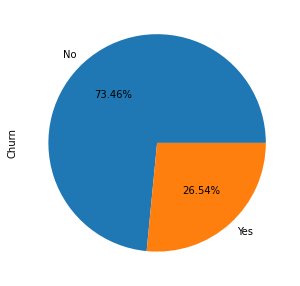

In [23]:
# Inspecting the Dataset
# The pie plot is for getting an overview of total number of churned/not churned customers
# The autopct set at 2 decimal to get a precise idea of the segregation of target values.
plot = data.Churn.value_counts().plot.pie(y='Churn', figsize=(5, 5), autopct='%.2f%%')

In [24]:
# In order to get overview of the coloumn name, null values, count and data types of predictor variables
# in the dataset.
data.info()
# describe function is used to get insightful statistics like mean, standard deviation
# count, min, max and percentile values of the data. 
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


**Interpreting the pair plots** - In order to visualize the relationship between data, seaborn's pairplot functionality has been used. 



1.   The diagonal axis is the histogram for the particular variable plotted against the number of occurrences.
2.   The bottom left and bottom right plots capture the same information, except the axis is flipped.



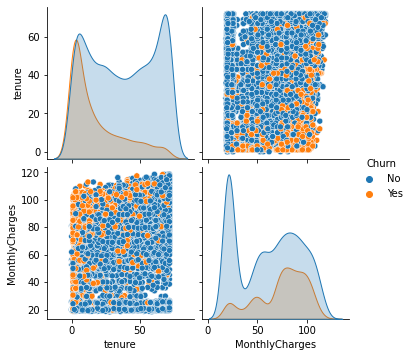

In [25]:
 # pairplot plots pairwise relationships in the data, hue is the name of the target variable in the data.
 # reference - https://seaborn.pydata.org/generated/seaborn.pairplot.html
sns.pairplot(data[['Churn', 'tenure', 'MonthlyCharges']], hue="Churn")

Inference from the above pair-plots -


*   The diagonal plots top-left and bottom-right give the **density plot of data**. Considering just the **monthly charges** as a variable we see that for lower monthly charges the churn is less and higher for the contrary. Now, considering just the **tenure** as the variable, we see that distribution of churned clients is uniform, whereas for non-churned client is right-skewed.

*   The bottom-left and top-right plots state a common fact - customers with **less tenure** with the company and **higher monthly charges** have **churned**!

This will be further understood by a box plot of the same.




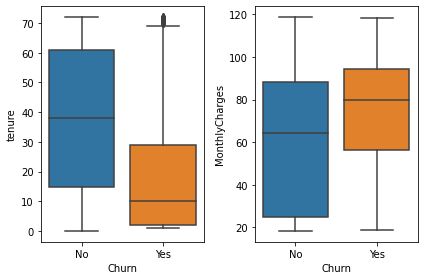

In [26]:
# To organize our plots and keep them in the same figure
# reference - https://seaborn.pydata.org/generated/seaborn.boxplot.html
fig, axs = plt.subplots(ncols=2)
# First box plot of tenure vs churn
sns.boxplot(x='Churn', y='tenure', data=data, ax=axs[0])
# Second box plot for monthly charges vs churn
sns.boxplot(x='Churn', y='MonthlyCharges', data=data, ax=axs[1])

# this prevents plots from overlapping
plt.tight_layout()

**Interpreting Box plot-**



*   The first box plot is comparing the tenure quartiles between the two groups. What we can see is that - median tenure for churned customers is a lot shorter than unchurned customers. Approx. 75% of the customers end up leaving the Telco within first 30 months of joining.
*   The second box compares the monthly charges vs churn. The median monthly charges of churned customers is significantly higher than those who didn't churn. 

Further cementing the fact that in order to retain customers offers, promotions and perks are necessary.



**Demographic Variables:**

From the dataset we can also examine the categorical variables, starting with demographic variables like - Gender, SeniorCitizen, Partner, Dependents. 



In [27]:
# Code courtesy - https://gist.github.com/edwardcqian/359b0a4447ab9121e4dc08663bbd0df4#file-cp6-py
# reference - https://seaborn.pydata.org/generated/seaborn.countplot.html
'''
this snippet of code helps organize our plots and keep them in the same figure
columns: List[str] - each column is its own chart
title: str - title is used as the title of each chart
function only works for 3 or more columns
'''
def plot_categoricals(columns, title):
  fig, axs = plt.subplots(ncols=2, nrows=int(len(columns) / 2) + len(columns) % 2)
  fig.set_size_inches(15, 15)

  row = col = 0
  for column in columns:
    plot_title = '{}: {}'.format(title, column)
    sns.countplot(x=column, hue="Churn", data=data, ax=axs[row][col]).set_title(plot_title)

    if col == 1:
      col = 0
      row += 1
    else:
      col += 1

  # this prevents plots from overlapping
  plt.tight_layout()

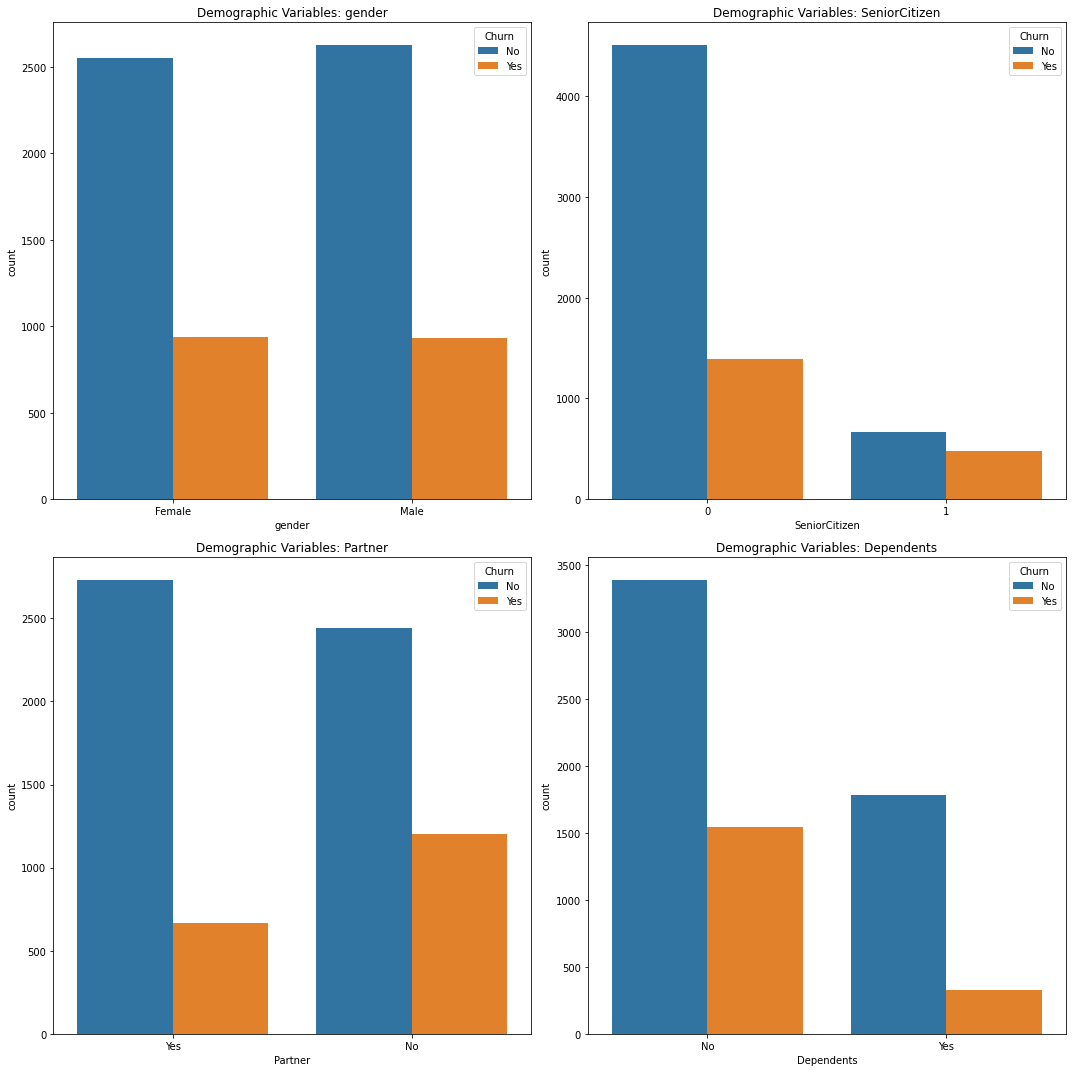

In [28]:
# plot demographic features
plot_categoricals(['gender', 'SeniorCitizen', 'Partner', 'Dependents'], 'Demographic Variables')

**Inferring the demographic plot-**



*   For the top-left plot of count vs gender in analysis of churn, there is very **little** difference in churn propotions between males and females.
*   There is a **higher** proportion of churn amongst senior citizens(top-right chart), customers with no partners(bottom-left chart) and customers with no dependents(bottom-right chart).

**Note:** 

*What is particularly insightful is that non-senior citizens with no partners and no dependents are an intersection of customers that indicate less frequent churn and speaks positively towards customer retention for the Telco.*


**Other Categorical Variables -**

The other categorical variables can be divided between service and billing
information.

**Service Variables** include - 

*Phone Service, Multiple Lines, Internet Service, Online Security, Online Backup, Device Protection, Tech Support, Streaming TV and Streaming Movies*

**Billing Variables** include - 

*Contract, Paperless Billing and Payment Method*

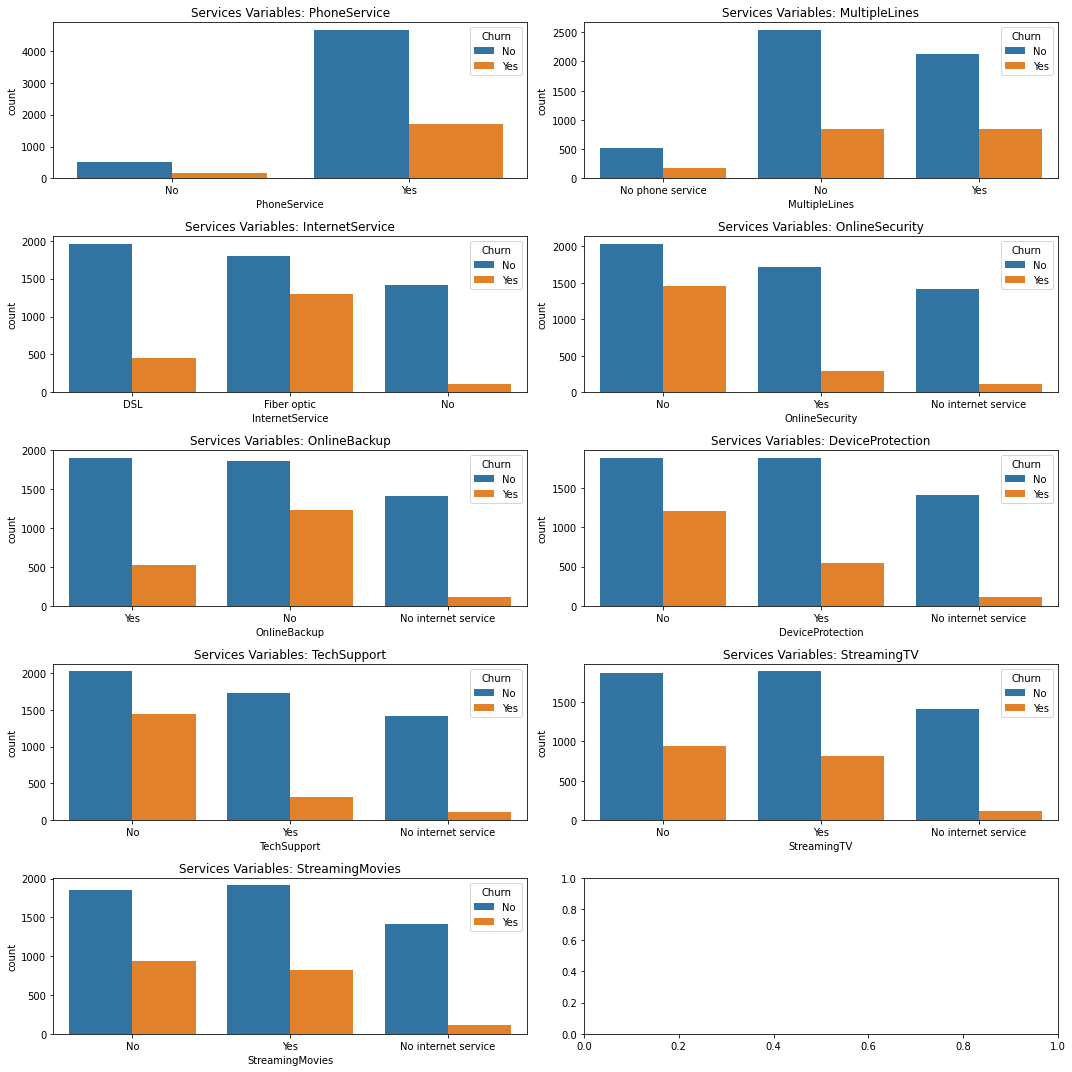

In [29]:
# Plot service features
plot_categoricals(['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'], 'Services Variables')

**Interpreting from the plots -**



*   Significantly more customers with only phone service will NOT churn than those of other customers.
*   Customers with multiple lines churn at approximately the same rate as those with a single line.
*   For services like online backup, device protection and tech support there is a **higher** churn rate with users who dont use these services, reason being they were not interested in staying long enough to benefit from them.
*  Customers with TV Streaming and/or Movie Streaming services churn more than all other services offered by Telco.


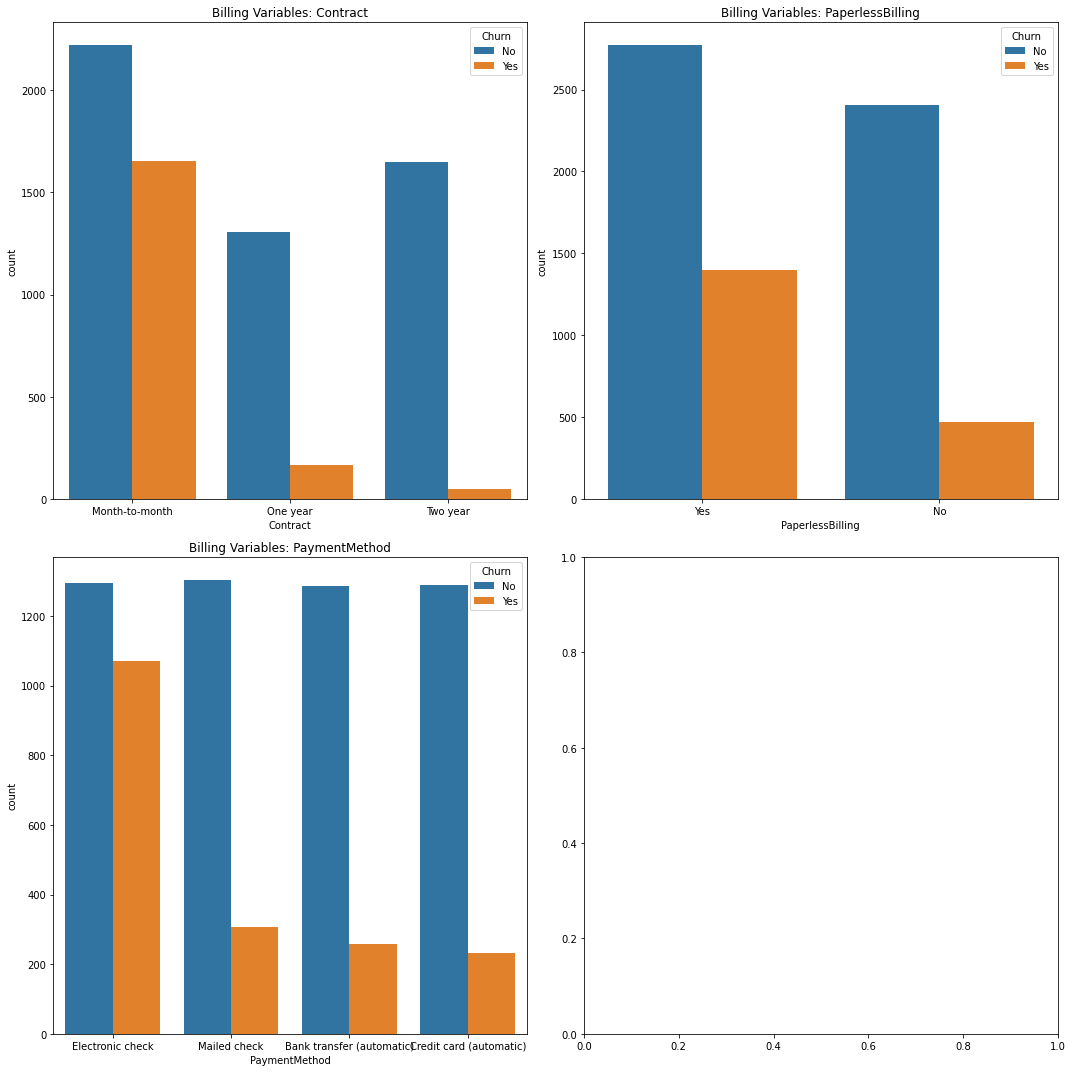

In [30]:
# plot billing features
plot_categoricals(['Contract', 'PaperlessBilling', 'PaymentMethod'], 'Billing Variables')

**Interpreting the plots -** 



*   The top-left chart compares churn across contract type. To no surprise, *Customers with contract of month-to-month churned **more**, as they are not bound by staying with the company.*
Those with longer plans face additional barriers/penalties when cancelling prematurely.
*   Those who opted for paperless billing are **more** frequent to churn as well as those who pay by Electronic cheque. This gives some indication that these behaviours may be corelated with other variables. ie., *Older customers might have preferred towards paper bills*





## 5. Feature Selection

The plotting and visualization has given a fair idea of what are the important features to comnsider when we move ahead to make our Model.

We can use this information in conjuncture with **Chi-squared test** to make a more informed decision about what features to select.

*We can only use Chi-squared test for assessing categorical values and their significance.*

**About Chi-Squared Test**- 


*Its a way to compare when you collect data, is the variation in the data just due to chance or is it due to one of the feature variables that you are actually testing.*

$x^2_c=\sum \frac{(O_i - E_i)^2}{E_i}$

$x^2_c$ - Chi Squared

$O_i$ - Observed data value

$E_i$ - Expected values

We need to understand p-values to interpret the Chi-sqauared output.

*References* -

https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/

https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html

### Preparing the Dataset for Data Modeling

In [31]:
dataFinal = pd.read_csv('https://raw.githubusercontent.com/kshitijzutshi/Teleco-Customer-Churn-Prediction/main/dataset/Telco-Customer-Churn.csv')
# In the TotalCharges column, 11 records are an empty string. All of these
# records have a valid MonthlyCharges value, but a tenure of 0. We can impute
# these values using 0
dataFinal['TotalCharges'] = dataFinal['TotalCharges'].apply(lambda x: 0 if x == ' ' else x)

# One hot encoding for categorical variables
# Reference - https://www.marsja.se/how-to-use-pandas-get_dummies-to-create-dummy-variables-in-python/
categorical_cols = [col for col in dataFinal.columns if col not in ['customerID',
                                                               'MonthlyCharges',
                                                               'TotalCharges',
                                                               'tenure',
                                                               'Churn']]

# write a simple function for one hot encoding a categorical column
def onehot_column(df, categorical_col):
  dummy_columns = pd.get_dummies(df[categorical_col], prefix=categorical_col)
  # axis{0/’index’, 1/’columns’}, default 0 -> The axis to concatenate along.
  return pd.concat([df.drop(columns=categorical_col), dummy_columns], axis=1)

for col in categorical_cols:
  dataFinal = onehot_column(dataFinal, col)
  
dataFinal.drop(columns='customerID', inplace=True)
# convert the target values of yes/no to a binary one
y = dataFinal['Churn'].apply(lambda x: 0 if x == 'No' else 1)
X = dataFinal.drop(columns='Churn')

# partition training and testing set
# Split the data into training and testing (80/20 is a good starting point)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Feature Selection 
# Reference - https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html

feature_selector = SelectKBest(chi2, k='all')
X_kbest = feature_selector.fit(X_train, y_train)
p_values = feature_selector.pvalues_




Q. Which independent variables are useful to predict a target (dependent variable)?


---


After the feature selection step and EDA we can conclude that the following features mentioned below are useful in predicting the target.

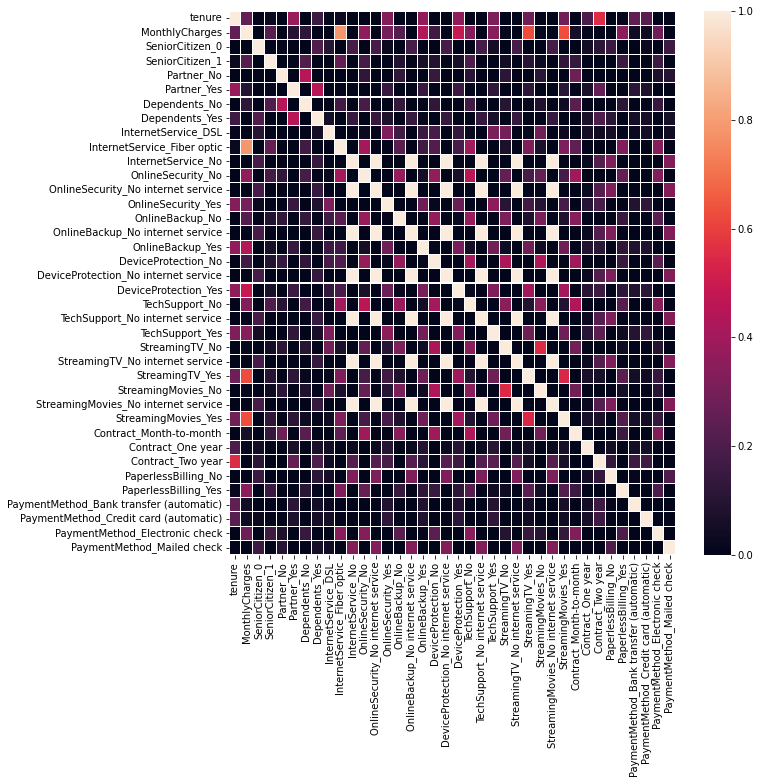

In [57]:
# Get sns heatmap of the data
# snsHeatmapData = pd.read_csv('https://raw.githubusercontent.com/kshitijzutshi/Teleco-Customer-Churn-Prediction/main/dataset/Telco-Customer-Churn.csv')
fig, ax = plt.subplots(figsize=(10,10)) 
ax = sns.heatmap(X_train.corr(), linewidths=.1, vmin=0, vmax=1)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fde26ecca10>,
      dtype=object)

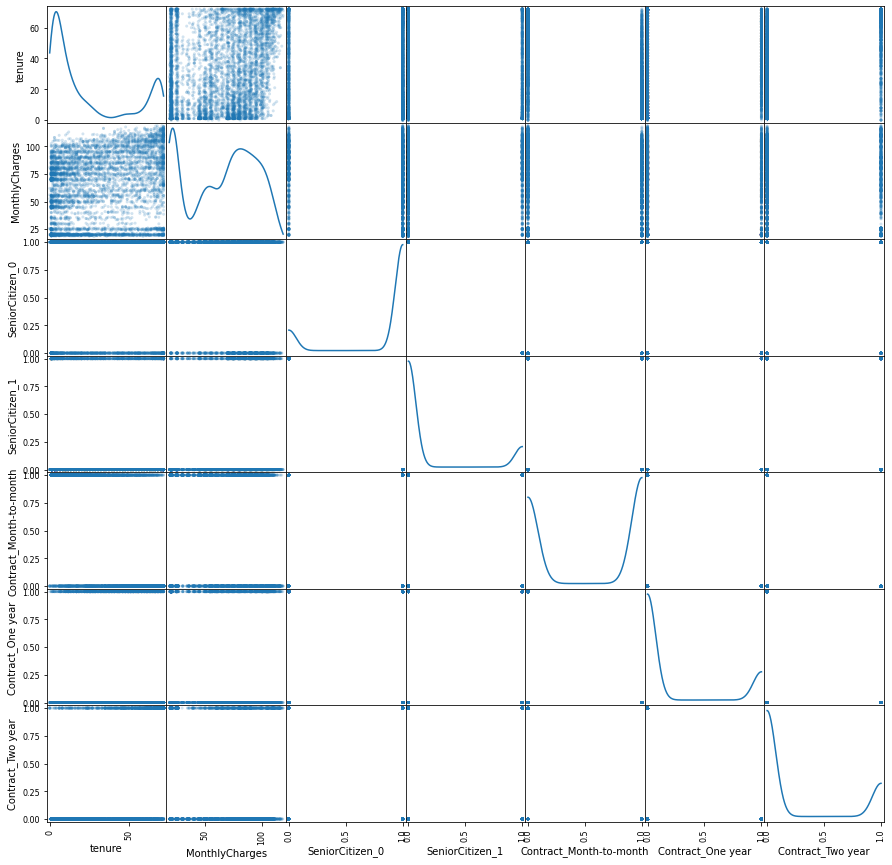

In [73]:
X_train_sel = X_train[['tenure', 'MonthlyCharges', 'SeniorCitizen_0', 'SeniorCitizen_1','Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year']]
X_train_sel
scatter_matrix(X_train_sel, alpha=0.2, figsize=(15, 15), diagonal='kde')

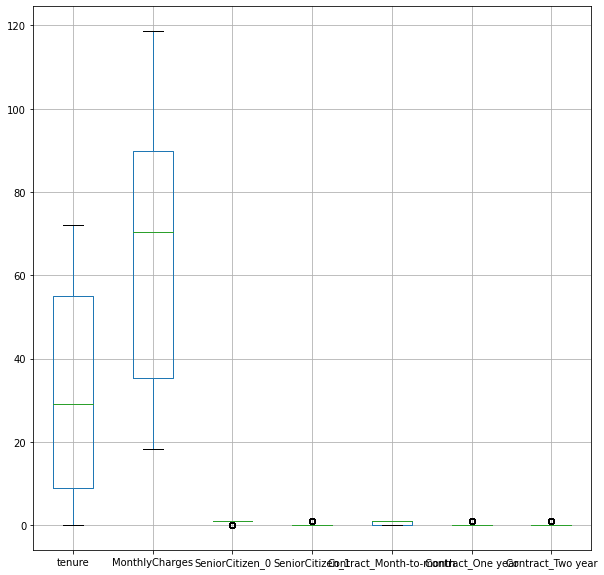

In [80]:
X_train_sel.boxplot(figsize=(10,10),fontsize=)

In [65]:
X_train.columns


Index(['tenure', 'MonthlyCharges', 'SeniorCitizen_0', 'SeniorCitizen_1',
       'Partner_No', 'Partner_Yes', 'Dependents_No', 'Dependents_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaperlessBilling_No', 'PaperlessBilling_Yes',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMet

Q. Is there any predictor variables independent of all the other predictor variables?


---


From the sns heatmap correlation we can see that for features with correlation value of 1 indicates its highly correlated to itself, hence is independent of all other predictor variables.


Q. Which predictor variables are the most important?



---



From the EDA and feature selection, we can say that features like - tenure, monthly charges, senior citizen flag, partner flag, dependents flag, billing variables, service variables are significant enough to predict the Churn of customers from Telco.


In [55]:
# As we can see the number of colmn have reduced from 46 to 38
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5634 entries, 1814 to 5157
Data columns (total 38 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   tenure                                   5634 non-null   int64  
 1   MonthlyCharges                           5634 non-null   float64
 2   SeniorCitizen_0                          5634 non-null   uint8  
 3   SeniorCitizen_1                          5634 non-null   uint8  
 4   Partner_No                               5634 non-null   uint8  
 5   Partner_Yes                              5634 non-null   uint8  
 6   Dependents_No                            5634 non-null   uint8  
 7   Dependents_Yes                           5634 non-null   uint8  
 8   InternetService_DSL                      5634 non-null   uint8  
 9   InternetService_Fiber optic              5634 non-null   uint8  
 10  InternetService_No                       5634

Q. Do the training and test sets have the same data?


---


Using the `train_test_split` function from the scikit learn library and using the params passsed in the function like - `test_size` and `random state`, the data was split in a **shuffled/random** way in the ratio of **80/20**, Thus making sure that **train and test DONT have same data**.


From the above p-values, p-values for most of the features are very low.

Only gender, multiple lines and phone service have p-values > 0.05, a plot for the p-values can show the same.

**What this means?**  


*The P-value indicates the % of more “extreme” observations*
*if the null hypothesis is true and if we repeat the* 
*same experiment many times. The null hypothesis here is that* 
*the feature has no effect on the target (i.e. we should not*
*use it as a predictor).* 

*Low p-values suggest we should reject our null hypothesis*

*— in other words, reject the claim that the feature has no effect.*





H(null hypothesis): gender, multiple lines and phone service features have no effect in prediction of churn.

H(alternate): cant be proven as we do not have enough evidence to reject the claim that these features have no effect.

Hence based on this the following colmns. are dropped - 

*gender_Female, gender_Male, PhoneService_Yes, PhoneService_No, MultipleLines_Yes, MultipleLines_No phone service, MultipleLines_No*

*TotalCharges* will also be dropped since the same information is captured by MonthlyCharges, Tenure to further reduce the dimensionality(as the other two colmns are more relateable)

```
# Following are from the p-values array
gender_Male - 1.80876520e-05
gender_Female - 4.17630801e-01 
MultipleLines_Yes - 1.48122032e-14
MultipleLines_No phone service - 2.22444627e-02
MultipleLines_No -  1.31184331e-01 
PhoneService_Yes - 1.41516539e-01
PhoneService_No - 6.20619626e-01 

```

To visualize the same

P-Values for the feature selector: 

[0.00000000e+00 0.00000000e+00 0.00000000e+00 4.14155083e-01
 4.17630801e-01 1.80876520e-05 1.74830192e-22 2.90276578e-13
 2.89042713e-14 5.17347720e-10 8.83963891e-22 1.31184331e-01
 6.20619626e-01 1.41516539e-01 1.31184331e-01 2.22444627e-02
 1.48122032e-14 7.36054171e-68 1.10505633e-51 2.10139213e-72
 1.10505633e-51 4.66279862e-26 1.09121361e-51 1.10505633e-51
 2.01113650e-07 3.59847408e-45 1.10505633e-51 8.69157125e-05
 4.74526541e-70 1.10505633e-51 1.32843441e-23 7.34641090e-15
 1.10505633e-51 5.93453956e-04 2.77106038e-13 1.10505633e-51
 8.10166551e-05 1.36617020e-91 4.67923539e-31 1.25187727e-88
 2.80987471e-26 8.68689825e-19 1.18572241e-15 1.03687540e-16
 3.49806319e-74 5.92860513e-10]


([0, 1, 2, 3, 4, 5], <a list of 6 Text major ticklabel objects>)

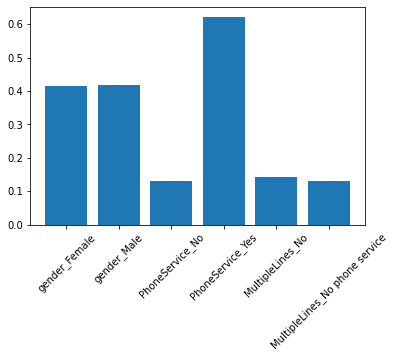

In [32]:
# Reference - https://gist.github.com/edwardcqian/ace626f82e25f6cd86dd3420edaf59e7#file-pvalues-py

print('P-Values for the feature selector: \n')
print(p_values)
p_above_thresh = [(i, p) for i, p in enumerate(p_values) if p > 0.05]

plt.bar(height=[i[1] for i in p_above_thresh],
x=X_train.columns[[i[0] for i in p_above_thresh]])
plt.xticks(rotation=45)

In [33]:
print(X_train.head())

      tenure  ...  PaymentMethod_Mailed check
1814      12  ...                           1
5946      42  ...                           0
3881      71  ...                           0
2389      71  ...                           0
3676      30  ...                           0

[5 rows x 46 columns]


In [34]:
dataFinal.describe()

,tenure,MonthlyCharges,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.495244,0.504756,0.837853,0.162147,0.516967,0.483033,0.700412,0.299588,0.096834,0.903166,0.481329,0.096834,0.421837,0.343746,0.439585,0.216669,0.496663,0.216669,0.286668,0.438450,0.216669,0.344881,0.439443,0.216669,0.343888,0.493114,0.216669,0.290217,0.398978,0.216669,0.384353,0.395428,0.216669,0.387903,0.550192,0.209144,0.240664,0.407781,0.592219,0.219225,0.216101,0.335794,0.228880
std,24.559481,30.090047,0.500013,0.500013,0.368612,0.368612,0.499748,0.499748,0.458110,0.458110,0.295752,0.295752,0.499687,0.295752,0.493888,0.474991,0.496372,0.412004,0.500024,0.412004,0.452237,0.496232,0.412004,0.475363,0.496355,0.412004,0.475038,0.499988,0.412004,0.453895,0.489723,0.412004,0.486477,0.488977,0.412004,0.487307,0.497510,0.406726,0.427517,0.491457,0.491457,0.413751,0.411613,0.472301,0.420141
min,0.000000,18.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,35.500000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,29.000000,70.350000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,89.850000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,72.000000,118.750000,1.000000,1.

In [35]:
# Dropping colmns with less significance to predict churn
X_train = X_train.drop(columns=['gender_Female', 'gender_Male',
                                'PhoneService_No', 'PhoneService_Yes',
                                'MultipleLines_No', 'MultipleLines_Yes',
                                'MultipleLines_No phone service',
                                'TotalCharges'])

X_test = X_test.drop(columns=['gender_Female', 'gender_Male',
                              'PhoneService_No', 'PhoneService_Yes',
                              'MultipleLines_No', 'MultipleLines_Yes',
                              'MultipleLines_No phone service',
                              'TotalCharges'])

## Licensing & Citation


scikit-learn citations: http://scikit-learn.org/stable/about.html#citing-scikit-learn

https://github.com/edwardcqian for using the github gists code snippets for the work.

`MIT	open source license`

`Open Software License 3.0	    osl-3.0`
